# Choosing a prospective tariff for a telecom company

At our disposal there is data of Megaline, a federal mobile operator. The customers are offered two tariff plans: "Smart" and "Ultra". To adjust the advertising budget, the commercial department wants to understand which tariff brings in more money. It is necessary to conduct analysis of the tariffs on a small sample of customers. We have the data of 500 Megaline users at our disposal: who they are, where they come from, what tariff they use, how many calls and messages each sent in 2018. It is necessary to analyze the behavior of customers and conclude which tariff is better.


## Studying the data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st
data_calls = pd.read_csv('/datasets/calls.csv')
display(data_calls.head(10)) # getting the table
data_calls.info() # getting general info
data_calls['call_date'].describe()
data_calls['duration'].describe()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Having opened the first dataset, we see 4 columns and 202607 rows. There are no gaps in the columns, there are data types of the float64(1), int64(1), object(2). The dataset contains data on calls (date and duration), user ID and unique call number (id). We also looked at the data of the call_date column, from it we see that the data is presented for a year period. We studied the data on the duration of calls. There are zero values, but we know that this is not an error as the zeros indicate missed calls, so they do not need to be deleted.

In [49]:
data_internet = pd.read_csv('/datasets/internet.csv')
display(data_internet.head(10)) # getting the table
data_internet.info() # getting general info
data_internet['mb_used'].describe()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

The second dataset contains data on Internet usage: 5 columns, 149396 rows, there are no gaps, there are data types of float64, int64, object. In this dataset id denotes a unique session number. In mb_used we see that the minimum value is 0. This can be considered a data error, but perhaps these are those users who do not use the Internet.

In [50]:
data_messages = pd.read_csv('/datasets/messages.csv')
display(data_messages.head(10)) # getting the table
data_messages.info() # getting general info

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


The third dataset contains data on the use of messages: 3 columns, 123036 rows, there are no gaps, there are data  types of int64 and object. In this dataset id denotes a unique message number.

In [51]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
display(data_tariffs.head(10)) # getting the table
data_tariffs.info() # getting general info

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


This dataset contains data on tariffs, presented in 2 rows and 8 columns, data types are int64 are object, there are no gaps.

In [52]:
data_users = pd.read_csv('/datasets/users.csv')
display(data_users.head(10)) # getting the table
data_users.info() # getting general info
data_users['city'].unique()
data_users['age'].value_counts()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


53    14
42    14
63    13
64    13
71    13
21    12
40    12
73    12
29    11
39    11
37    11
47    11
26    11
41    10
45    10
58    10
36    10
70    10
52    10
65     9
66     9
56     9
68     9
20     9
51     9
50     9
48     9
30     9
19     9
24     9
28     9
27     9
23     9
62     8
60     8
55     8
69     8
44     8
25     7
31     7
35     7
67     7
74     7
43     7
32     7
46     7
18     6
59     6
54     6
75     6
38     5
34     5
72     5
33     5
22     5
57     4
49     4
61     3
Name: age, dtype: int64

This dataset contains data about users. We see 500 rows and 8 columns. There are gaps in the churn_rate column
- this is the date of termination of the use of the tariff (if the value is omitted, then the tariff was still valid at the time of data upload).

Having looked at the columns city and age, we haven:t found any anomalies.

### Conclusion

Having opened data from 5 sources, we have 5 tables with different number of rows. 4 tables have a common column  (user_id). In the rest datasets we see that the columns with the same name contain different data.

## Data preprocessing

In [53]:
# bringing the data to the necessary type
# first, let's change the data in data_calls['call_date'] to datetime
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
# let's put the month into a separate category and put this data in a separate column, as this will be required for further analysis
data_calls['month'] = data_calls['call_date'].dt.month
# let's round up the minutes in duration
data_calls['duration'] = data_calls['duration'].apply(np.ceil)

In [54]:
# # in the data_internet table we change the data in data_internet['session_date'] to datetime and also create the month column
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet['month'] = data_internet['session_date'].dt.month


In [55]:
# in the data_messages table we change the data in data_messages['session_date'] to datetime and also create the month column 
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages['month'] = data_messages['message_date'].dt.month


In [56]:
# in the data_users table we change the data in data_users['reg_date'] to datetime
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')


In the data_calls table we see  values 0, but we will leave them, since these zeros indicate missed calls


In [57]:
# in the data_internet table we also see 0 values 
# it is possible that these are users who do not use the mobile Internet, but it is included in the tariff
data_internet['mb_used'].describe()
data_internet['mb_used'].value_counts()

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
182.69        1
726.03        1
315.12        1
898.99        1
677.66        1
Name: mb_used, Length: 70003, dtype: int64

### As the next step, we will make tables and calculate the necessary indicators

In [58]:
# for each month let's calculate the number of calls and minutes spent by each user
calls_pivot = data_calls.pivot_table(index = ['user_id', 'month'], values='duration', aggfunc = 'sum')
display(calls_pivot)

duration
user_id month          
1000    5         159.0
        6         172.0
        7         340.0
        8         408.0
        9         466.0
...                 ...
1498    10        247.0
1499    9          70.0
        10        449.0
        11        612.0
        12        492.0

[3174 rows x 1 columns]

In [59]:
# for each month let's calculate  the number of messages sent by each user
messages_pivot = data_messages.pivot_table(index = ['user_id', 'month'], values='id', aggfunc = 'count')
messages_pivot.columns = ['total_messages']
display(messages_pivot)

total_messages
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

In [60]:
# for each month let's calculate the amount of Internet traffic used by  each user and round it up
internet_pivot = data_internet.pivot_table(index = ['user_id', 'month'], values='mb_used', aggfunc = 'sum')
internet_pivot.columns = ['total_traffic_mb']
internet_pivot['total_traffic_gb'] = (internet_pivot['total_traffic_mb'] / 1024).apply(np.ceil)
display(internet_pivot)

total_traffic_mb  total_traffic_gb
user_id month                                    
1000    5               2253.49               3.0
        6              23233.77              23.0
        7              14003.64              14.0
        8              14055.93              14.0
        9              14568.91              15.0
...                         ...               ...
1498    10             20579.36              21.0
1499    9               1845.75               2.0
        10             17788.51              18.0
        11             17963.31              18.0
        12             13055.58              13.0

[3203 rows x 2 columns]

In [61]:
#  merging the tables for further calculations
final_data = (
    calls_pivot.merge(
        messages_pivot, on=['user_id', 'month'], how='outer').merge(
        internet_pivot['total_traffic_gb'], on=['user_id', 'month'], how='outer')
).reset_index()
display(final_data)

,user_id,month,duration,total_messages,total_traffic_gb
0,1000,5,159.0,22.0,3.0
1,1000,6,172.0,60.0,23.0
2,1000,7,340.0,75.0,14.0
3,1000,8,408.0,81.0,14.0
4,1000,9,466.0,57.0,15.0
...,...,...,...,...,...
3209,1489,9,NaN,32.0,17.0
3210,1489,10,NaN,21.0,20.0
3211,1489,11,NaN,20.0,18.0
3212,1489,12,NaN,35.0,17.0


In [62]:
# merging the table with user data
final_data = final_data.merge(data_users[['user_id', 'city', 'tariff']], on='user_id', how='left')
display(final_data)

,user_id,month,duration,total_messages,total_traffic_gb,city,tariff
0,1000,5,159.0,22.0,3.0,Краснодар,ultra
1,1000,6,172.0,60.0,23.0,Краснодар,ultra
2,1000,7,340.0,75.0,14.0,Краснодар,ultra
3,1000,8,408.0,81.0,14.0,Краснодар,ultra
4,1000,9,466.0,57.0,15.0,Краснодар,ultra
...,...,...,...,...,...,...,...
3209,1489,9,NaN,32.0,17.0,Санкт-Петербург,smart
3210,1489,10,NaN,21.0,20.0,Санкт-Петербург,smart
3211,1489,11,NaN,20.0,18.0,Санкт-Петербург,smart
3212,1489,12,NaN,35.0,17.0,Санкт-Петербург,smart


In [63]:
# attaching the table with tariff data to the main table and convert megabytes to gigabytes
final_data = final_data.merge(data_tariffs.rename(columns={'tariff_name': 'tariff'}), on='tariff')
final_data['gb_per_month_included'] = (final_data['mb_per_month_included'] / 1024).apply(np.ceil)
display(final_data)

,user_id,month,duration,total_messages,total_traffic_gb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,159.0,22.0,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0
1,1000,6,172.0,60.0,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0
2,1000,7,340.0,75.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0
3,1000,8,408.0,81.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0
4,1000,9,466.0,57.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,17.0,11.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0
3210,1489,9,NaN,32.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0
3211,1489,10,NaN,21.0,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0
3212,1489,11,NaN,20.0,18.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0


In [65]:
# creating a function for calculating revenue from each user
def income(row):
    minutes_over = (row['duration'] - row['minutes_included']) * row['rub_per_minute']
    messages_over = (row['total_messages'] - row['messages_included']) * row['rub_per_message']
    gb_over = (row['total_traffic_gb'] - row['gb_per_month_included']) * row['rub_per_gb']
    if minutes_over < 0:
        minutes_over = 0
    if messages_over < 0:
        messages_over = 0
    if gb_over < 0:
        gb_over = 0
    return minutes_over + messages_over + gb_over + row['rub_monthly_fee']

final_data['total_income'] = final_data.apply(income, axis = 1)
 

In [66]:
final_data['total_income'].describe()

count    2667.00000
mean     1504.47994
std       796.07941
min       550.00000
25%       747.50000
50%      1550.00000
75%      1950.00000
max      6770.00000
Name: total_income, dtype: float64

In [67]:
# displaying the general table with revenue for each client
display(final_data)

,user_id,month,duration,total_messages,total_traffic_gb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,total_income
0,1000,5,159.0,22.0,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1000,6,172.0,60.0,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1000,7,340.0,75.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1000,8,408.0,81.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1000,9,466.0,57.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,17.0,11.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN
3210,1489,9,NaN,32.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN
3211,1489,10,NaN,21.0,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN
3212,1489,11,NaN,20.0,18.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN


### Conclusion


At this stage the data was previewed and prepared. For some columns, we changed the values to datetime so that a month could be allocated in a separate column. Zero values were found in calls and traffic, but it is most logical not to delete them, since this means that the person either did not use the service in the tariff, or these were missed calls.

Next, we calculated for each month the number of calls  and minutes  used by each client, the number of sent messages and the internet used monthly, having previously converted megabytes to gigabytes.

At the last stage, the revenue from each client was calculated.

## Data analysis

### Analysis of the behavior of smart and ultra tariff users regarding calls

In [68]:
# we will make a data slice for users of the smart tariff and study the characteristic values of the duration of calls
smart_users = final_data.query('tariff =="smart"')
display(smart_users)
smart_users['duration'].describe()

,user_id,month,duration,total_messages,total_traffic_gb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,total_income
985,1001,11,430.0,NaN,18.0,Москва,smart,50,15360,500,550,200,3,3,15.0,NaN
986,1001,12,414.0,NaN,14.0,Москва,smart,50,15360,500,550,200,3,3,15.0,NaN
987,1002,6,117.0,4.0,11.0,Стерлитамак,smart,50,15360,500,550,200,3,3,15.0,550.0
988,1002,7,214.0,11.0,18.0,Стерлитамак,smart,50,15360,500,550,200,3,3,15.0,1150.0
989,1002,8,289.0,13.0,20.0,Стерлитамак,smart,50,15360,500,550,200,3,3,15.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,17.0,11.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN
3210,1489,9,NaN,32.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN
3211,1489,10,NaN,21.0,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN
3212,1489,11,NaN,20.0,18.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN


count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: duration, dtype: float64

We see that on average, smart tariff users use 419 minutes per month, the median value is 423 minutes with a maximum of 1435 and a minimum of 0.

In [69]:
# we will make a data slice for users of the ultra tariff and study the characteristic values of the duration of calls
ultra_users = final_data.query('tariff =="ultra"')
display(ultra_users)
ultra_users['duration'].describe()

,user_id,month,duration,total_messages,total_traffic_gb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,total_income
0,1000,5,159.0,22.0,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1000,6,172.0,60.0,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1000,7,340.0,75.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1000,8,408.0,81.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1000,9,466.0,57.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1473,9,NaN,19.0,17.0,Красноярск,ultra,1000,30720,3000,1950,150,1,1,30.0,NaN
981,1473,10,NaN,20.0,14.0,Красноярск,ultra,1000,30720,3000,1950,150,1,1,30.0,NaN
982,1473,11,NaN,14.0,22.0,Красноярск,ultra,1000,30720,3000,1950,150,1,1,30.0,NaN
983,1473,12,NaN,20.0,18.0,Красноярск,ultra,1000,30720,3000,1950,150,1,1,30.0,NaN


count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: duration, dtype: float64

We see that on average, ultra tariff users use 545 minutes per month, the median value is 528 minutes, with a maximum of 1673 and a minimum of 0.

In [71]:
# calculating the average amount of minutes for for the smart tariff
mean_duration_smart = smart_users['duration'].mean()
print("The average amount of minutes for the smart tariff", mean_duration_smart)

# считаем среднее для тарифа ultra
mean_duration_ultra = ultra_users['duration'].mean()
print("The average amount of minutes for the ultra tariff", mean_duration_ultra)

The average amount of minutes for the smart tariff 419.0629779577148
The average amount of minutes for the ultra tariff 545.4511041009464


In [72]:
# the variance for calls of the smart tariff
variance_duration_smart = np.var(smart_users['duration'], ddof=1)
print('The variance for calls of the smart tariff', variance_duration_smart)

# the variance for calls of the ultra tariff
variance_duration_ultra = np.var(ultra_users['duration'], ddof=1)
print('tThe variance for calls of the ultra tariff', variance_duration_ultra)

The variance for calls of the smart tariff 35844.1895513438
tThe variance for calls of the ultra tariff 94203.41839614812


In [73]:
# finding the standard deviation for calls in the smart tariff
st_duration_smart = np.sqrt(variance_duration_smart)
print('Standard deviation for calls in the smart tariff', st_duration_smart)

# finding the standard deviation for calls in the ultra tariff
st_duration_ultra = np.sqrt(variance_duration_ultra)
print('Standard deviation for calls in the ultra tariff', st_duration_ultra)

Standard deviation for calls in the smart tariff 189.3256177894154
Standard deviation for calls in the ultra tariff 306.92575388218586


Text(0.5, 1.0, 'Histogram for the smart tariff calls')

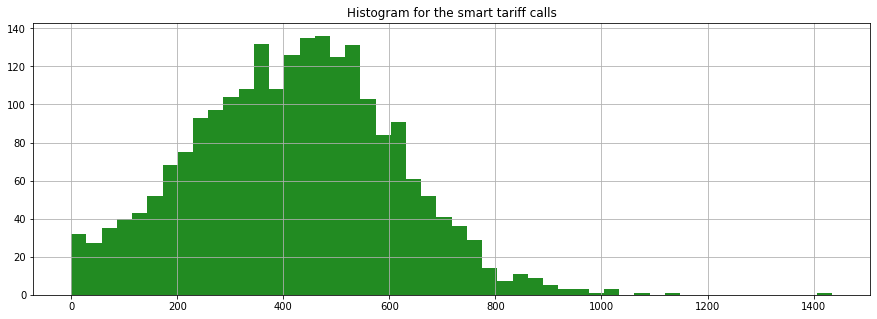

In [74]:
# building a histogram for the smart tariff
smart_users['duration'].hist(bins=50, figsize=(15,5), color='forestgreen')
plt.title('Histogram for the smart tariff calls')

From the histogram we can see that the duration of calls is mainly in the range from 200 to 620 minutes. Calls longer than 700 minutes are much rarer, and we see abnormally long calls exceeding 1000 minutes.

Text(0.5, 1.0, 'Histogram for the ultra tariff calls')

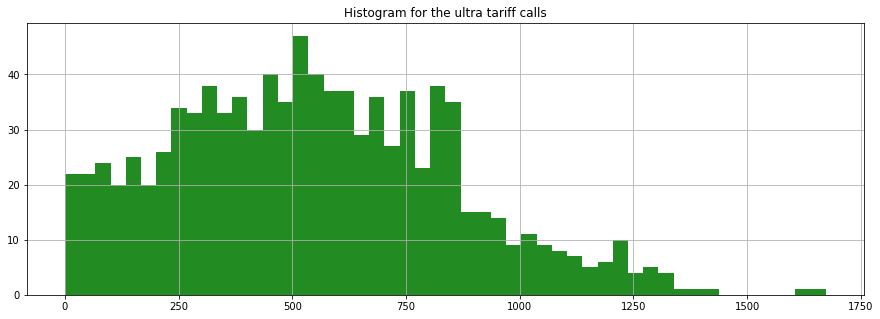

In [75]:
# building a histogram for the ultra tariff
ultra_users['duration'].hist(bins=50, figsize=(15,5), color='forestgreen')
plt.title('Histogram for the ultra tariff calls')

From the histogram we see that basically the duration of calls in the ultra tariff is in the range from 200 to 850 minutes. Next, we see a smooth "tail" of calls. In this tariff, it is obvious that longer calls are more common, and abnormally large values are in the range of 1600 min.

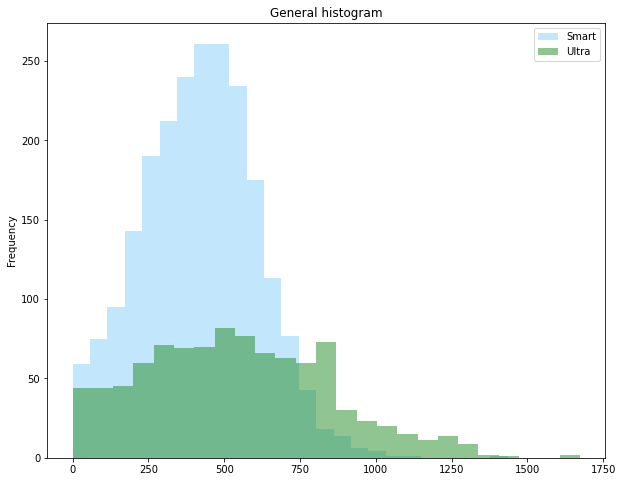

In [77]:

import seaborn as sns
colors = ['lightskyblue', 'forestgreen']
sns.set_palette(colors)

final_data.groupby('tariff')['duration'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Smart', 'Ultra'])
plt.title('General histogram')

plt.show()

### Conclusion


After analyzing the data on the duration of calls of the 2 tariffs, we can conclude that the average and median duration of calls in the smart and ultra tariffs differs.  The average value of minutes for the smart tariff is 419 and the average value of minutes for the ultra  tariff is 545. Ultra tariff users make longer calls.

The standard deviation of the duration of calls on the smart tariff is 189 and for the ultra tariff it is 306. For the ultra tariff, the fluctuation is higher, as can be seen on the histogram.

From the histogram we see that basically the duration of calls for the smart tariff is in the range from 200 to 620 minutes. Calls longer than 700 minutes are much rarer, and we see abnormally long calls exceeding 1000 minutes. The duration of calls in the ultra tariff is in the range from 200 to 850 minutes. In this tariff, it can be seen that longer calls are more common, and there are abnormally large values in the range of 1600 min.




### Analysis of the behavior of users of the smart and the ultra tariff regarding messages

In [78]:
# let's look at the basic information on messages for both tariffs
smart_users['total_messages'].describe()

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: total_messages, dtype: float64

We see that on average, smart tariff users send 38 messages per month. The median is 34 messages, the minimum is 1 and the maximum is 143.

In [29]:
ultra_users['total_messages'].describe()

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: total_messages, dtype: float64

We see that on average, users of the ultra tariff send one and a half times more messages compared to the smart tariff - 61 messages per month. The median is 51 messages, the minimum is 1 and the maximum is 224.

In [79]:
# calculating the average amount of messages for the smart tariff
mean_messages_smart = smart_users['total_messages'].mean()
print("The average amount of messages for smart", mean_messages_smart)

# calculating the average amount of messages for the ultra tariff
mean_messages_ultra = ultra_users['total_messages'].mean()
print("the average amount of messages for ultra", mean_messages_ultra)

The average amount of messages for smart 38.71644120707596
the average amount of messages for ultra 61.161006289308176


In [80]:
# the variance for smart
variance_messages_smart = np.var(smart_users['total_messages'], ddof=1)
print('The variance for smart', variance_messages_smart)

# the variance for ultra
variance_messages_ultra = np.var(ultra_users['total_messages'], ddof=1)
print('The variance for ultra', variance_messages_ultra)

The variance for smart 717.5942011753547
The variance for ultra 2109.6591828651995


In [81]:
# the standard deviation for smart
st_messages_smart = np.sqrt(variance_messages_smart)
print('The standard deviation for smart', st_messages_smart)

# the standard deviation for ultra
st_messages_ultra = np.sqrt(variance_messages_ultra)
print('The standard deviation for ultra', st_messages_ultra)

The standard deviation for smart 26.787948804926344
The standard deviation for ultra 45.93102636416042


Text(0.5, 1.0, 'The histogram for messages in the smart tariff')

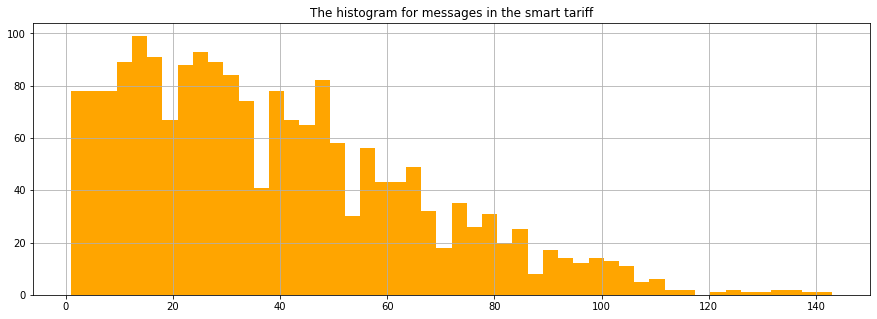

In [82]:
# the histogram for smart
smart_users['total_messages'].hist(bins=50, figsize=(15,5), color='orange')
plt.title('The histogram for messages in the smart tariff')


From the histogram, we see that smart tariff users send about 40 messages on average, after the point of 60 the number of messages decreases, and it is clear that there are very few users sending more than 100 messages per month.

Text(0.5, 1.0, 'The histogram for messages in the ultra tariff')

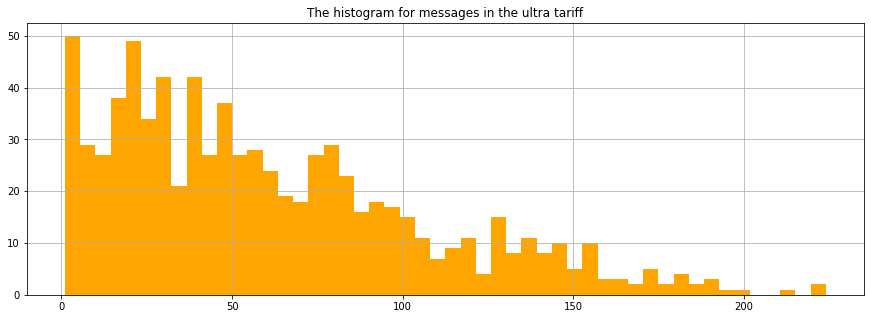

In [84]:
# histogram for the smart tariff
ultra_users['total_messages'].hist(bins=50, figsize=(15,5), color='orange')
plt.title('The histogram for messages in the ultra tariff')

On this histogram we see a peak at 0. Apparently, a lot of tariff users do not use the message package. It can be seen that the data is unevenly distributed. However, the average number of messages is around 61. The standard deviation for the ultra tariff is 45, which just explains the single peaks on the chart after the point of 60 and beyond. Perhaps there are users who really like sms.

### Conclusion

After analyzing the data of the messages of the 2 tariffs, we can conclude that the average and median number of messages in the smart and ultra tariffs is also different. The average number of messages on the smart tariff is 38 and the average number of messages on the ultra tariff is 61. Users of the ultra tariff send significantly more messages.

The standard deviation of the number of messages for the smart tariff is 26 and for the ultra tariff 45. For the ultra tariff, the fluctuations are also higher.

From the histogram we see that basically the number of messages for the smart tariff is in the range from 20 to 90. However, the histogram shows peaks after the average value, and the median is below the average (51 vs 61, respectively). There are outliers of more than 200 messages. In the ultra tariff, users obviously use messages more often than in the smart tariff.

### Analysis of the behavior of smart and ultra tariff users regarding internet traffic

In [85]:
# getting general info
smart_users['total_traffic_gb'].describe()

count    2228.000000
mean       16.336176
std         5.737923
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: total_traffic_gb, dtype: float64

We see that on average, smart tariff users use 16 GB per month. The median is 17 GB, the minimum is 0 and the maximum is 38.

In [86]:
ultra_users['total_traffic_gb'].describe()

count    975.000000
mean      19.694359
std        9.702924
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: total_traffic_gb, dtype: float64

We see that on average, smart tariff users use more Internet - 19 GB per month. The median is 19 GB, the minimum is 0 and the maximum is 49.

In [87]:
# calculating the average amount of traffic in the smart tariff
mean_traffic_smart = smart_users['total_traffic_gb'].mean()
print("The average amount of traffic in the smart tariff", mean_traffic_smart)

# calculating the average amount of traffic in the ultra tariff
mean_traffic_ultra = ultra_users['total_traffic_gb'].mean()
print("The average amount of traffic in the ultra tariff", mean_traffic_ultra)

The average amount of traffic in the smart tariff 16.33617594254937
The average amount of traffic in the ultra tariff 19.694358974358973


In [88]:
# the variance for smart
variance_traffic_smart = np.var(smart_users['total_traffic_gb'], ddof=1)
print('The variance of the internet traffic for the smart tariff', variance_traffic_smart)

# the variance for ultra
variance_traffic_ultra = np.var(ultra_users['total_traffic_gb'], ddof=1)
print('The variance of the internet traffic for the ultra tariff', variance_traffic_ultra)

The variance of the internet traffic for the smart tariff 32.92375582354312
The variance of the internet traffic for the ultra tariff 94.14673405991682


In [89]:
# the standard deviation for smart
st_traffic_smart = np.sqrt(variance_traffic_smart)
print('The standard deviation for smart', st_traffic_smart)

# the standard deviation for ultra
st_traffic_ultra = np.sqrt(variance_traffic_ultra)
print('The standard deviation for ultra', st_traffic_ultra)

The standard deviation for smart 5.737922605224221
The standard deviation for ultra 9.70292399536948


Text(0.5, 1.0, 'Histogram of the internet traffic for the smart tariff')

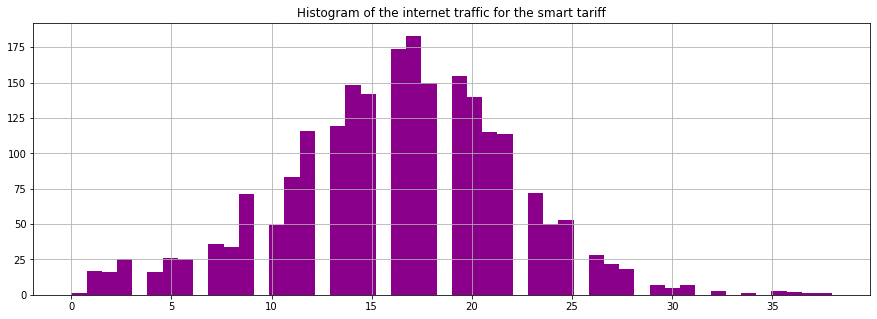

In [91]:
# histogram for the smart tariff 
smart_users['total_traffic_gb'].hist(bins=50, figsize=(15,5), color='darkmagenta')
plt.title('Histogram of the internet traffic for the smart tariff')

From the histogram it is obvious that the traffic is mainly distributed between values from 13 to 23 GB per month. Judging by to its form the histogram represents a normal distribution. There is a small "tail" of large values, but after  mark 30 they almost do not occur.

Text(0.5, 1.0, 'Histogram of the internet traffic for the ultra tariff')

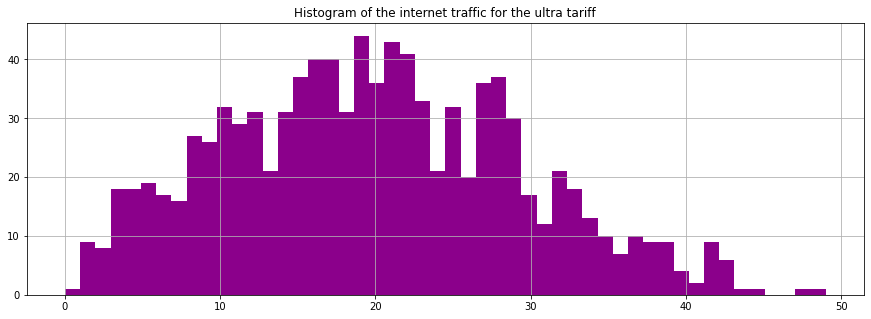

In [92]:
# histogram for the ultra tariff 
ultra_users['total_traffic_gb'].hist(bins=50, figsize=(15,5), color='darkmagenta')
plt.title('Histogram of the internet traffic for the ultra tariff')

The histogram of the ultra tariff traffic shows that the values are less evenly distributed. There are peaks after the average. Basically, the data is distributed between the range of 9 - 29 with an equal mean and median (19), with a standard deviation of 9.

### Conclusion

After analyzing the traffic data of the 2 tariffs, we can conclude that the average and median number of messages in the smart and ultra tariffs is also different. The average traffic value for the smart tariff is 16 and the average value for the ultra tariff is 91. Ultra tariff users use the Internet more actively.

The standard deviation of the quantity for the smart tariff is 5.7 and for the ultra tariff 9.7. For the ultra tariff, the fluctuations are also higher.

From the histogram we can see that basically the traffic volume for the smart tariff is in the range from 13 to 23 GB, and for the ultra tariff it is 9 and 29. There are anomalies in more than 30 and 40 GB, respectively. In the ultra tariff, users obviously use the Internet more than in the smart tariff.

### General conclusion on the analysis

After analyzing the behavior of users of smart and ultra tariffs, the following pattern can be identified: users of the ultra tariff use all types of the services more, which is expected.


In [93]:
# general tables

final_data.pivot_table(index='tariff', values=['duration', 'total_messages', 'total_traffic_gb'],
                       aggfunc=['mean', 'std', 'var'])

mean                                         std                 \
          duration total_messages total_traffic_gb    duration total_messages   
tariff                                                                          
smart   419.062978      38.716441        16.336176  189.325618      26.787949   
ultra   545.451104      61.161006        19.694359  306.925754      45.931026   

                                  var                                  
       total_traffic_gb      duration total_messages total_traffic_gb  
tariff                                                                 
smart          5.737923  35844.189551     717.594201        32.923756  
ultra          9.702924  94203.418396    2109.659183        94.146734

In [95]:
# multiindex
l1 = ['duration', 'total_messages', 'total_traffic_gb']
l2 = ['mean', 'var', 'std']
idx = pd.MultiIndex.from_product([l1, l2])


print(idx)

print('\n\n\nИндексы: ', idx[0], 'Первый: ', idx[0][0], 'Второй: ', idx[0][1])

df = pd.DataFrame(index=['smart', 'ultra'], columns=idx)

for i in df.columns:
     
    df.loc['smart',i] = np.round(final_data.query('tariff=="smart"')[i[0]].agg(i[1]),2)
    df.loc['ultra',i] = np.round(final_data.query('tariff=="ultra"')[i[0]].agg(i[1]),2)
    
df    

MultiIndex([(        'duration', 'mean'),
            (        'duration',  'var'),
            (        'duration',  'std'),
            (  'total_messages', 'mean'),
            (  'total_messages',  'var'),
            (  'total_messages',  'std'),
            ('total_traffic_gb', 'mean'),
            ('total_traffic_gb',  'var'),
            ('total_traffic_gb',  'std')],
           )



Индексы:  ('duration', 'mean') Первый:  duration Второй:  mean


duration                   total_messages                  \
          mean       var     std           mean      var    std   
smart   419.06  35844.19  189.33          38.72   717.59  26.79   
ultra   545.45  94203.42  306.93          61.16  2109.66  45.93   

      total_traffic_gb               
                  mean    var   std  
smart            16.34  32.92  5.74  
ultra            19.69  94.15   9.7

## Hypothesis testing

### Does the average revenue differ by the tariffs?

We are testing the hypothesis that the revenue of smart and ultra tariffs differs. Let the null hypothesis H0 mean that the average revenue is equal, the alternative hypothesis H1 means that the revenue is not equal. The threshold value is 5%.

In [44]:
display(smart_users['total_income'].mean())
display(ultra_users['total_income'].mean())

1290.6778067885118

2048.936170212766

In [96]:
# let's test the hypothesis that the average revenue from the two tariffs is different
# let's set a threshold value of 5% and test the two-way hypothesis

smart_users.dropna(subset = ['total_income'], inplace=True)
ultra_users.dropna(subset = ['total_income'], inplace=True)

alpha = .05
results = st.ttest_ind(
    smart_users['total_income'],
    ultra_users['total_income'])

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print("Refute the zero hypothesis")
else:
    print("Can not refute the zero hypothesis") 


p-значение 1.1515961964889327e-119
Refute the zero hypothesis


/tmp/ipykernel_48/1068902918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smart_users.dropna(subset = ['total_income'], inplace=True)
/tmp/ipykernel_48/1068902918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultra_users.dropna(subset = ['total_income'], inplace=True)


### The average revenue of users from Moscow differs from the revenue of users from other regions

We are testing the hypothesis that the revenue of the tariffs in Moscow and in other cities differs. Let the null hypothesis H0 mean that the average revenue is equal, the alternative H1 means that the revenue is not equal. The threshold value is 5%.

In [97]:
# identifying subscribers from Moscow and find the average revenue for them
moscow_users = final_data.query('city == "Москва"')
mean_moscow_users = moscow_users['total_income'].mean()
print('The average revenue for Moscow', mean_moscow_users)

# identifying subscribers not from Moscow and find the average revenue for them
other_users = final_data.query('city != "Москва"')
mean_other_users = other_users['total_income'].mean()
print('The average revenue for other regions', mean_other_users)



The average revenue for Moscow 1554.7107942973523
The average revenue for other regions 1493.1456801470588


In [98]:
# let's set a threshold value of 5% and test the two-way hypothesis
moscow_users.dropna(subset = ['total_income'], inplace=True)
other_users.dropna(subset = ['total_income'], inplace=True)

alpha = .05
results = st.ttest_ind(
    moscow_users['total_income'],
    other_users['total_income'])

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print("Refute the zero hypothesis")
else:
    print("Can not refute the zero hypothesis") 

p-значение 0.12167256176036186
Can not refute the zero hypothesis


/tmp/ipykernel_48/1063564133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moscow_users.dropna(subset = ['total_income'], inplace=True)
/tmp/ipykernel_48/1063564133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_users.dropna(subset = ['total_income'], inplace=True)


## Conclusion based on the hypotheses

According to the results of the t-tests, it was possible to find out:
- revenue for smart and ultra tariffs differs,
- revenue for Moscow and other cities does not differ.

## General conclusion

The data of 500 Megalyne users was studied in this project: who they are, where they come from, what tariff they use, how many calls and messages they sent in 2018. It was necessary to analyze the behavior of customers and make a conclusion on which tariff is better in order to adjust the advertising budget.

At the first stage the data preparation was carried out, data types were changed and the revenue was calculated according to tariffs for each user. For some columns we changed the data type to datetime so that a month could be identified. Zero values were found in calls and traffic, but it is most logical to leave them, since this means that the person either did not use the service in the tariff, or these are missed calls.

Then we calculated  the number of calls made and minutes of conversation spent by each user in each month. The same was made for the number of messages and the internet  traffic. before that we had  converted megabytes into gigabytes.

At the last stage, the revenue from each client was calculated.

Next, we analyzed the data using histograms. After analyzing the behavior of users of smart and ultra tariffs, the following pattern could be identified: the users of the ultra tariff use all types of services more, which is expected.

Next, t-tests were performed to test two-sided hypotheses. According to the results of these tests, it was found out that: the revenue for smart and ultra tariffs is different (users of the ultra tariff bring a lot of revenue), revenue in Moscow and other cities does not differ.

Based on the analysis, the following conclusions can be drawn:
- smart tariff users use the services proportionally less than ultra users. This applies to all services: calls (average 419 min vs 545 min), messages (38 vs 61) and the Internet (16 vs 19 GB). However, this difference is not too significant, given how much revenue the ultra tariff brings,
- revenue in Moscow and the regions does not differ. 

Thus, we can conclude that the ultra tariff is better.

